<a href="https://colab.research.google.com/github/AbhJ/Genetic-Algorithm-Term-Project/blob/main/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter number of locations (0 - 20) in integer f0orm: 20
Enter crossover rate (0 - 1) in floating point form: 0.3
Enter mutation rate (0 - 1) in floating point form: 0.07
Enter number of generations (0 - 100) in integer form: 85
Generation index: 0 | fitness of fittest tour: 140.17


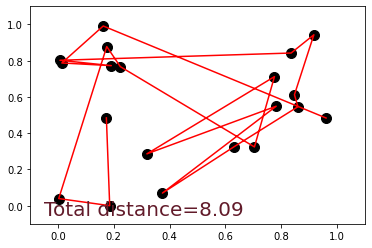

Generation index: 1 | fitness of fittest tour: 194.06


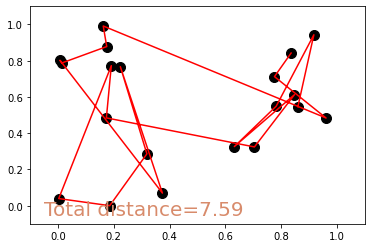

Generation index: 2 | fitness of fittest tour: 191.63


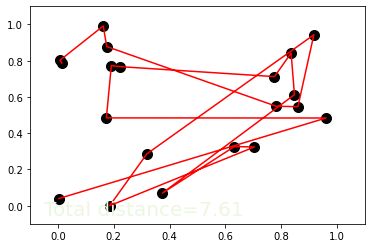

Generation index: 3 | fitness of fittest tour: 381.87


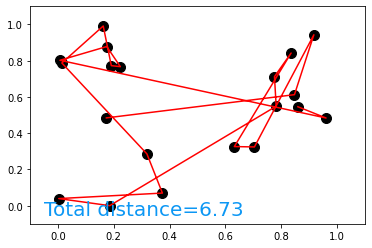

Generation index: 4 | fitness of fittest tour: 381.87


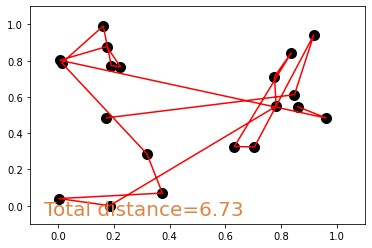

Generation index: 5 | fitness of fittest tour: 394.64


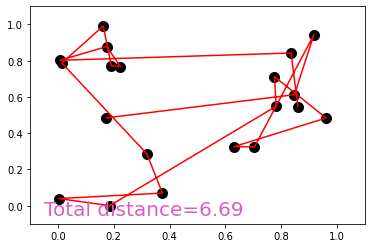

Generation index: 6 | fitness of fittest tour: 659.65


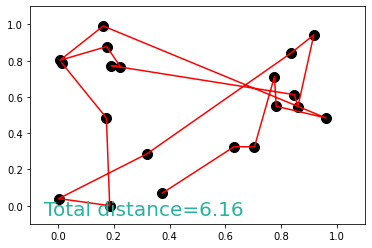

Generation index: 7 | fitness of fittest tour: 610.11


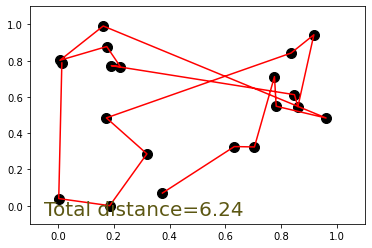

Generation index: 8 | fitness of fittest tour: 579.06


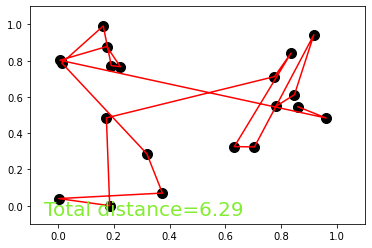

Generation index: 9 | fitness of fittest tour: 678.75


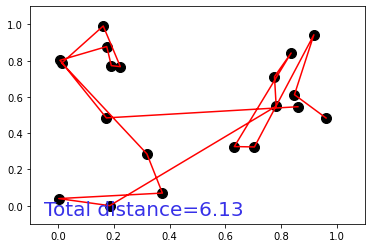

Generation index: 10 | fitness of fittest tour: 896.97


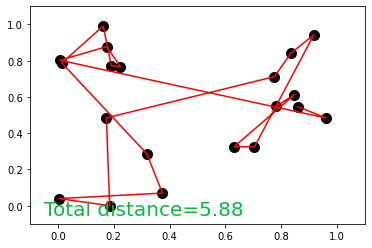

Generation index: 11 | fitness of fittest tour: 896.97


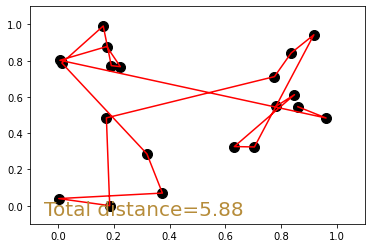

Generation index: 12 | fitness of fittest tour: 939.64


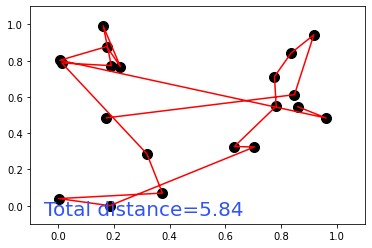

Generation index: 13 | fitness of fittest tour: 1550.85


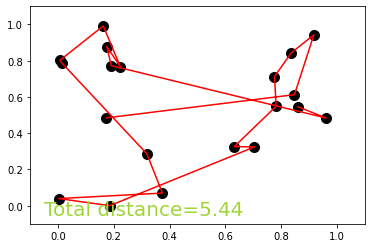

Generation index: 14 | fitness of fittest tour: 1550.85


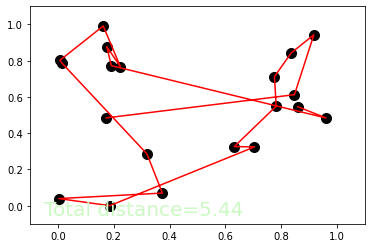

Generation index: 15 | fitness of fittest tour: 1362.88


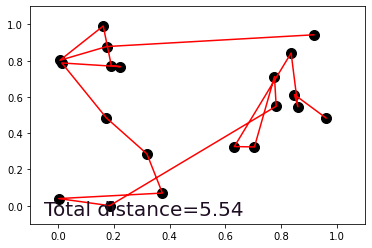

Generation index: 16 | fitness of fittest tour: 1999.42


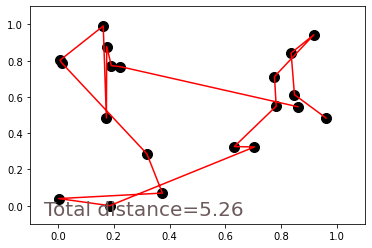

Generation index: 17 | fitness of fittest tour: 2187.50


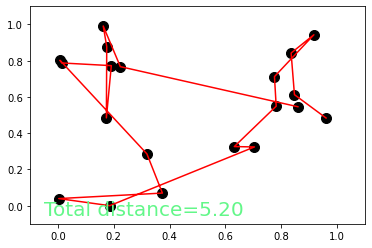

Generation index: 18 | fitness of fittest tour: 3009.33


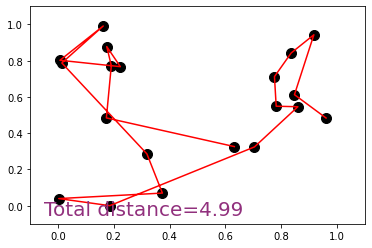

Generation index: 19 | fitness of fittest tour: 3538.07


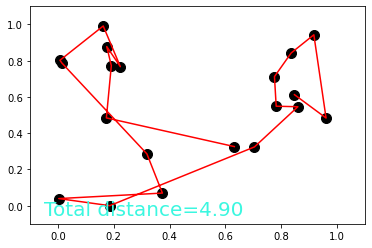

Generation index: 20 | fitness of fittest tour: 3009.33


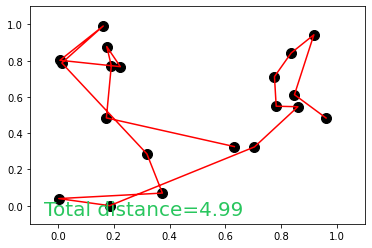

Generation index: 21 | fitness of fittest tour: 3286.27


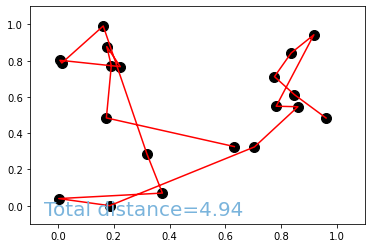

Generation index: 22 | fitness of fittest tour: 3286.27


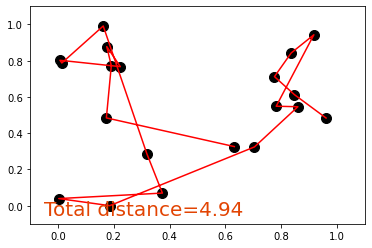

Generation index: 23 | fitness of fittest tour: 3286.27


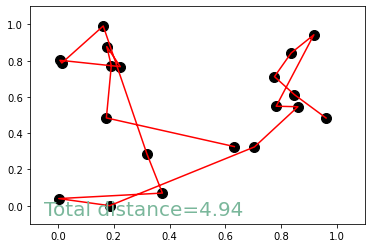

Generation index: 24 | fitness of fittest tour: 3671.59


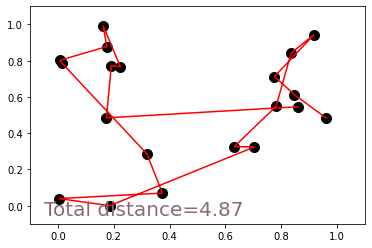

Generation index: 25 | fitness of fittest tour: 3671.59


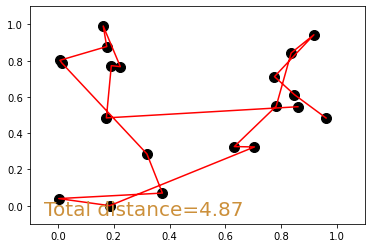

Generation index: 26 | fitness of fittest tour: 3671.59


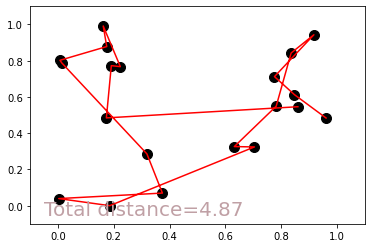

Generation index: 27 | fitness of fittest tour: 4028.48


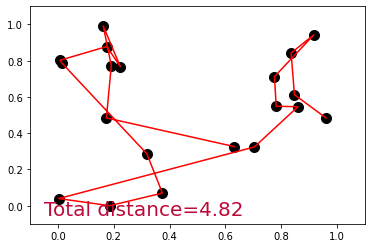

Generation index: 28 | fitness of fittest tour: 4102.44


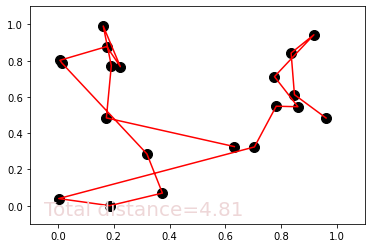

Generation index: 29 | fitness of fittest tour: 4028.48


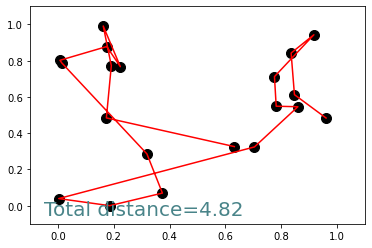

Generation index: 30 | fitness of fittest tour: 4028.48


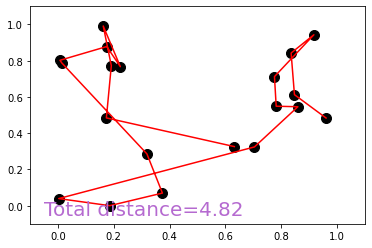

Generation index: 31 | fitness of fittest tour: 4028.48


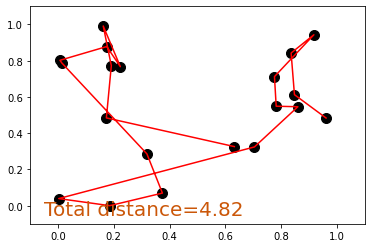

Generation index: 32 | fitness of fittest tour: 5177.26


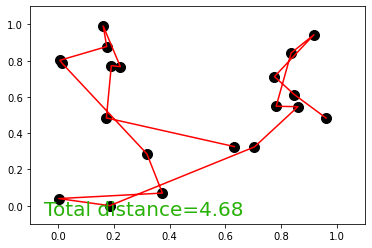

Generation index: 33 | fitness of fittest tour: 4660.87


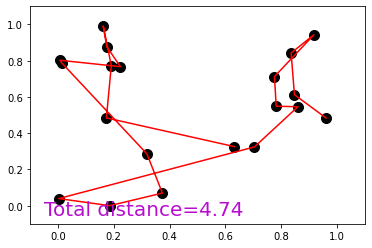

Generation index: 34 | fitness of fittest tour: 4698.20


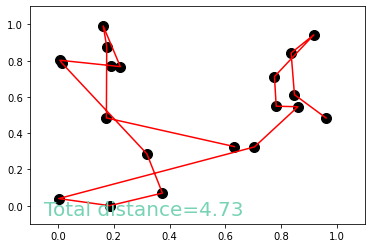

Generation index: 35 | fitness of fittest tour: 5386.68


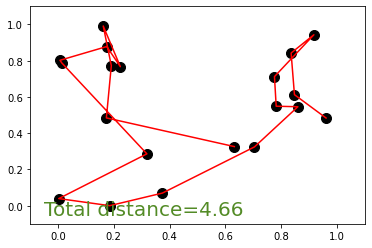

Generation index: 36 | fitness of fittest tour: 7258.02


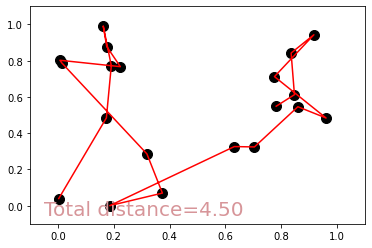

Generation index: 37 | fitness of fittest tour: 7258.02


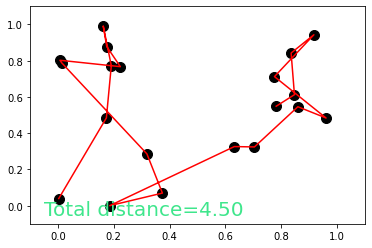

Generation index: 38 | fitness of fittest tour: 8353.53


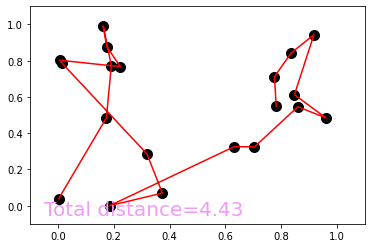

Generation index: 39 | fitness of fittest tour: 8353.53


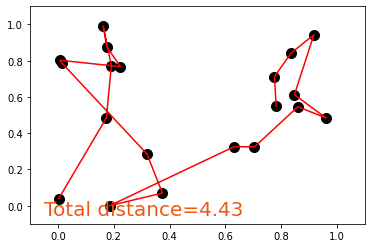

Generation index: 40 | fitness of fittest tour: 8353.53


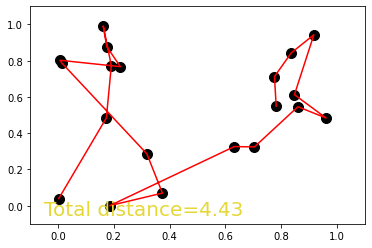

Generation index: 41 | fitness of fittest tour: 8353.53


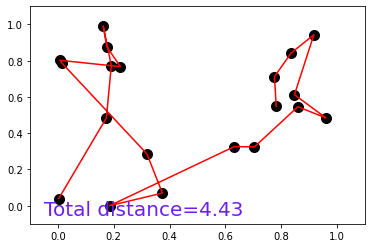

Generation index: 42 | fitness of fittest tour: 8353.53


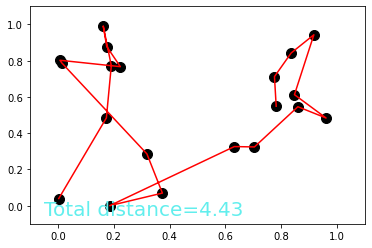

Generation index: 43 | fitness of fittest tour: 10128.68


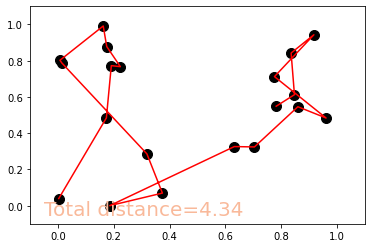

Generation index: 44 | fitness of fittest tour: 10128.68


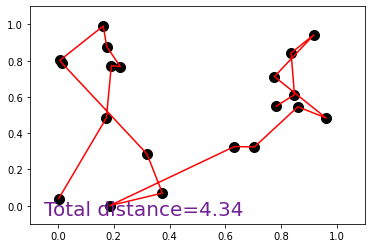

Generation index: 45 | fitness of fittest tour: 11952.40


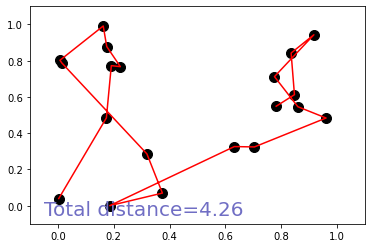

Generation index: 46 | fitness of fittest tour: 10231.23


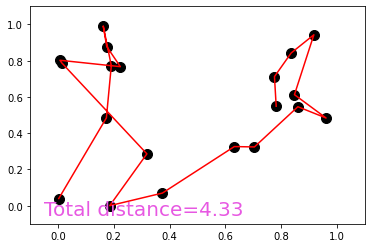

Generation index: 47 | fitness of fittest tour: 10982.06


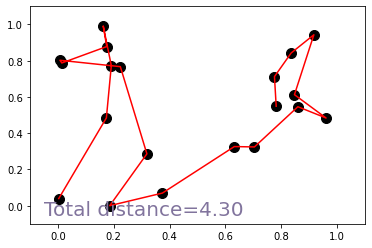

Generation index: 48 | fitness of fittest tour: 11974.97


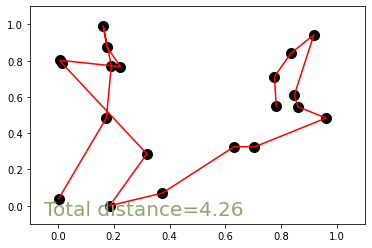

Generation index: 49 | fitness of fittest tour: 11974.97


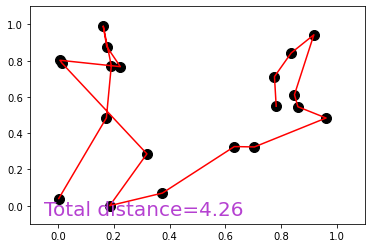

Generation index: 50 | fitness of fittest tour: 17382.56


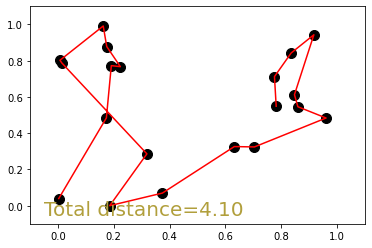

Generation index: 51 | fitness of fittest tour: 12714.66


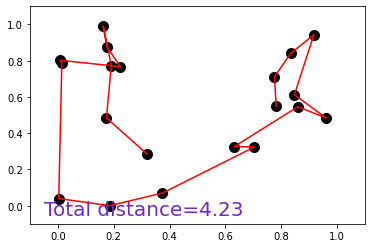

Generation index: 52 | fitness of fittest tour: 12714.66


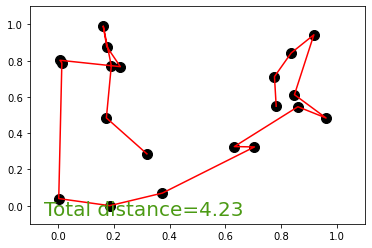

Generation index: 53 | fitness of fittest tour: 18933.65


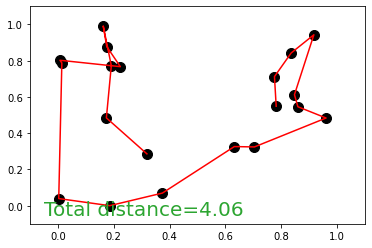

Generation index: 54 | fitness of fittest tour: 18933.65


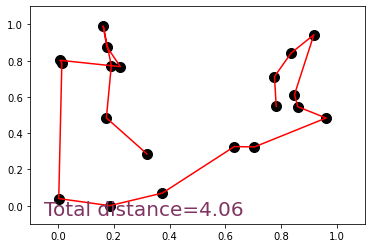

Generation index: 55 | fitness of fittest tour: 18933.65


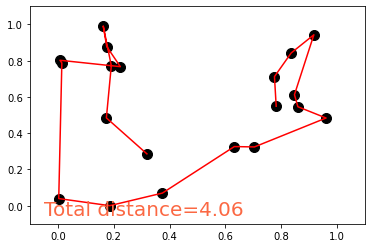

Generation index: 56 | fitness of fittest tour: 12093.61


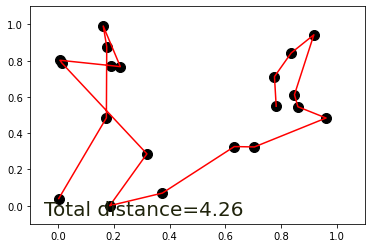

Generation index: 57 | fitness of fittest tour: 12885.22


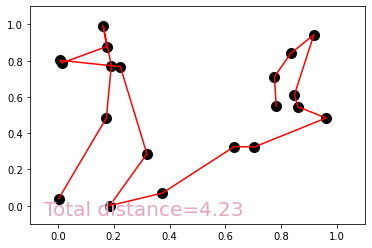

Generation index: 58 | fitness of fittest tour: 17382.56


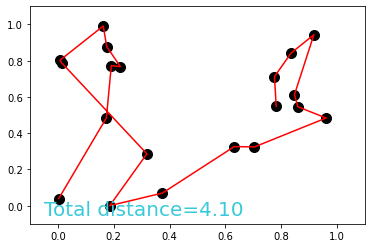

Generation index: 59 | fitness of fittest tour: 18050.43


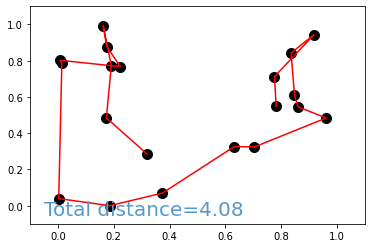

Generation index: 60 | fitness of fittest tour: 26738.26


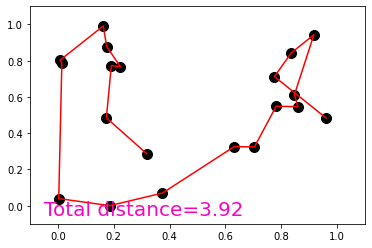

Generation index: 61 | fitness of fittest tour: 26738.26


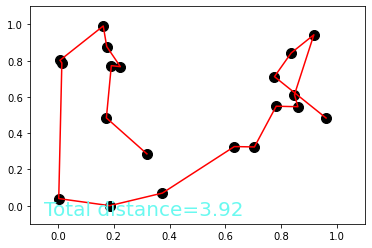

Generation index: 62 | fitness of fittest tour: 26738.26


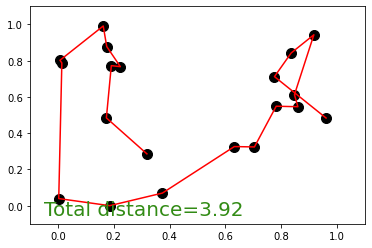

Generation index: 63 | fitness of fittest tour: 26738.26


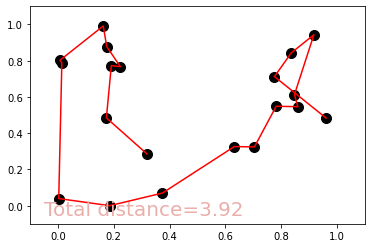

Generation index: 64 | fitness of fittest tour: 26738.26


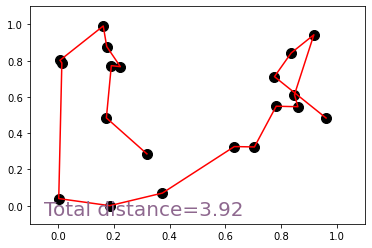

Generation index: 65 | fitness of fittest tour: 28549.28


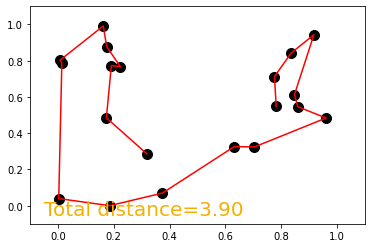

Generation index: 66 | fitness of fittest tour: 26738.26


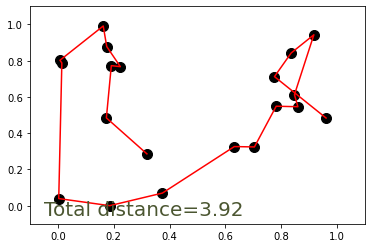

Generation index: 67 | fitness of fittest tour: 26738.26


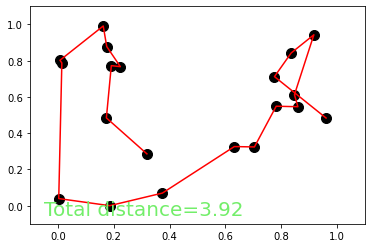

Generation index: 68 | fitness of fittest tour: 26738.26


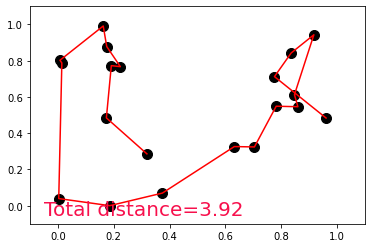

Generation index: 69 | fitness of fittest tour: 28549.28


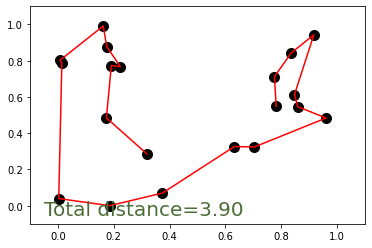

Generation index: 70 | fitness of fittest tour: 28549.28


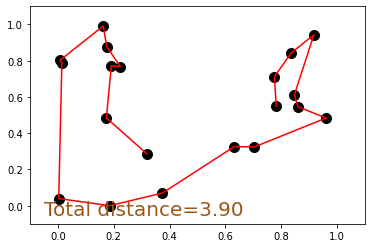

Generation index: 71 | fitness of fittest tour: 28549.28


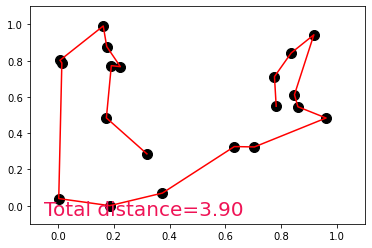

Generation index: 72 | fitness of fittest tour: 30300.27


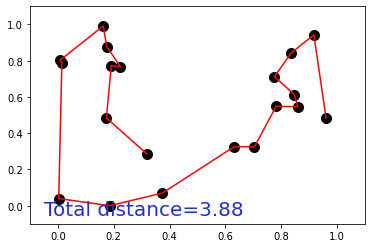

Generation index: 73 | fitness of fittest tour: 30300.27


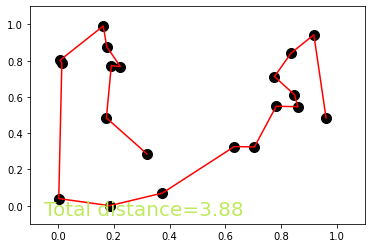

Generation index: 74 | fitness of fittest tour: 28549.28


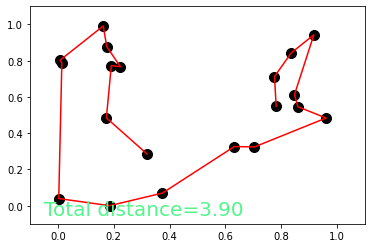

Generation index: 75 | fitness of fittest tour: 31649.20


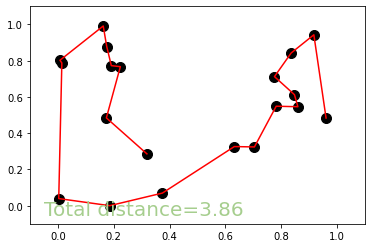

Generation index: 76 | fitness of fittest tour: 31649.20


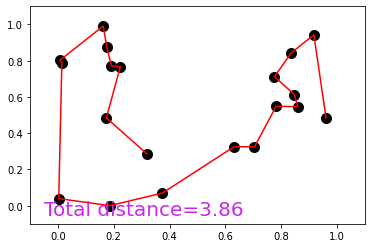

Generation index: 77 | fitness of fittest tour: 31649.20


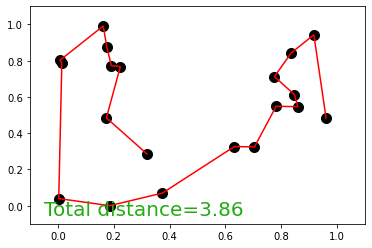

Generation index: 78 | fitness of fittest tour: 31649.20


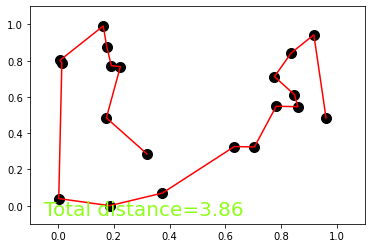

Generation index: 79 | fitness of fittest tour: 31649.20


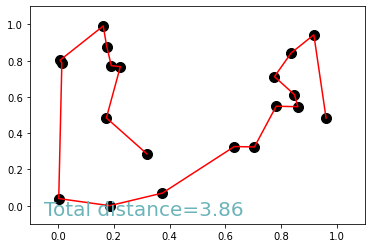

Generation index: 80 | fitness of fittest tour: 31649.20


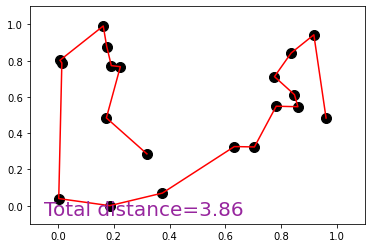

Generation index: 81 | fitness of fittest tour: 31649.20


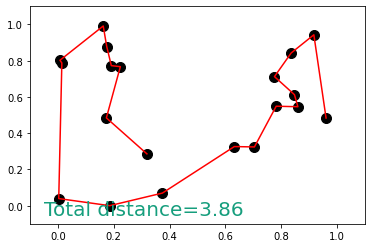

Generation index: 82 | fitness of fittest tour: 31649.20


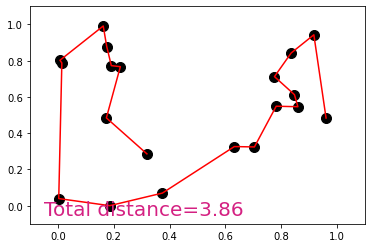

Generation index: 83 | fitness of fittest tour: 29952.72


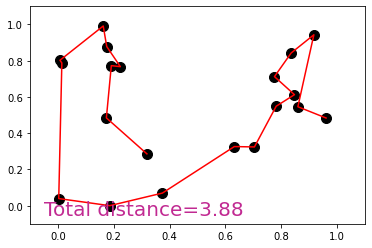

Generation index: 84 | fitness of fittest tour: 29805.28


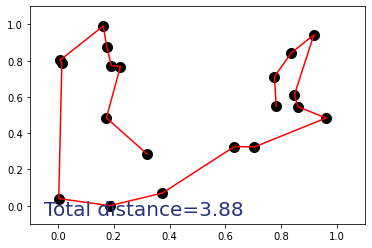

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np
# in TSP graph is complete


class TSP_using_GA(object):
	# this function initializes the variables in the class for the application of
	# evolutionary algorithm
    def __init__(self, location_count, cross_rate, mutation_rate, pop_size):
        self.location_count = location_count
        self.cross_rate = cross_rate
        self.mutation_rate = mutation_rate
        self.pop_size = pop_size
        self.pop = np.vstack([np.random.permutation(location_count) for _ in range(pop_size)])
	# this function is called in plotting graph and helps to create lines for
	# joining location nodes
    def helper_for_plotting_graph(self, graph, city_position):
        line_x = np.empty_like(graph, dtype=np.float64)
        line_y = np.empty_like(graph, dtype=np.float64)
        for i, d in enumerate(graph):
            city_coord = city_position[d]
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
        return line_x, line_y
	# this function selects and returns random child of given fitness value
    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]
	# this function returns fitness of a given graph in terms of metric or euclidean distance
    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = np.exp(self.location_count * 2 / total_distance)
        return fitness, total_distance
	# this is the evolutionary function that keeps getting called till the desired number of generations
    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop
	# this function generates cross over between two individuals with given cross-over rate
    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.location_count).astype(bool)      # choose crossover points
            keep_city = parent[~cross_points]                                       # find the city number
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent
	# this function mutates an individual with given mutation rate
    def mutate(self, child):
        for point in range(self.location_count):
            if np.random.rand() < self.mutation_rate:
                swap_point = np.random.randint(0, self.location_count)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

# this is the main function that runs the evolutionary algorithm
class ready_for_TSP(object):
    def __init__(self, n_cities):
        self.city_position = np.random.rand(n_cities, 2)
        plt.ion()

    def printer_function(self, lx, ly, total_d):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=100, c='k',)
        plt.plot(lx.T, ly.T, 'r-',)
        plt.text(-0.05, -0.05, "Total distance=%.2f" % total_d, fontdict={'size': 20, 'color': np.random.rand(3,)})
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        plt.pause(0.01)
location_count = int(input("Enter number of locations (0 - 20) in integer f0orm: ")) # count of locations
crossover_rate = float(input("Enter crossover rate (0 - 1) in floating point form: ")) # cross over rate
mutation_rate = float(input("Enter mutation rate (0 - 1) in floating point form: ")) # mutation rate
generation_count = int(input("Enter number of generations (0 - 100) in integer form: ")) # number of generations
ga = TSP_using_GA(location_count=location_count, cross_rate=crossover_rate, mutation_rate=mutation_rate, pop_size=500)
env = ready_for_TSP(location_count)
for generation in range(generation_count):
    lx, ly = ga.helper_for_plotting_graph(ga.pop, env.city_position)
    fitness, total_distance = ga.get_fitness(lx, ly)
    ga.evolve(fitness)
    best_idx = np.argmax(fitness)
    print('Generation index:', generation, '| fitness of fittest tour: %.2f' % fitness[best_idx])
    env.printer_function(lx[best_idx], ly[best_idx], total_distance[best_idx])


plt.ioff()
plt.show()